# Chapter 01. Neural network

In [1]:
# Testing codes (layers, neural)

import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from common.trainer import Trainer
from two_layer_net import TwoLayerNet

In [2]:
# hyperparameters

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

In [3]:
# Data reading + model, optimizer loading
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2,hidden_size=hidden_size,output_size=3)
optimizer = SGD(lr=learning_rate)

In [4]:
# Checking data
print(x[0], t[0])
print(len(x))

[-0.  0.] [1 0 0]
300


In [5]:
# training
trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)

| epoch 1 | iters 10 / 10 | time 0[s] | loss 1.126
| epoch 2 | iters 10 / 10 | time 0[s] | loss 1.126
| epoch 3 | iters 10 / 10 | time 0[s] | loss 1.116
| epoch 4 | iters 10 / 10 | time 0[s] | loss 1.116
| epoch 5 | iters 10 / 10 | time 0[s] | loss 1.112
| epoch 6 | iters 10 / 10 | time 0[s] | loss 1.138
| epoch 7 | iters 10 / 10 | time 0[s] | loss 1.159
| epoch 8 | iters 10 / 10 | time 0[s] | loss 1.109
| epoch 9 | iters 10 / 10 | time 0[s] | loss 1.117
| epoch 10 | iters 10 / 10 | time 0[s] | loss 1.129
| epoch 11 | iters 10 / 10 | time 0[s] | loss 1.117
| epoch 12 | iters 10 / 10 | time 0[s] | loss 1.108
| epoch 13 | iters 10 / 10 | time 0[s] | loss 1.088
| epoch 14 | iters 10 / 10 | time 0[s] | loss 1.077
| epoch 15 | iters 10 / 10 | time 0[s] | loss 1.044
| epoch 16 | iters 10 / 10 | time 0[s] | loss 1.035
| epoch 17 | iters 10 / 10 | time 0[s] | loss 0.957
| epoch 18 | iters 10 / 10 | time 0[s] | loss 0.918
| epoch 19 | iters 10 / 10 | time 0[s] | loss 0.924
| epoch 20 | iters 10

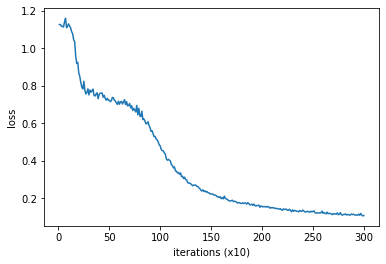

In [6]:
trainer.plot()

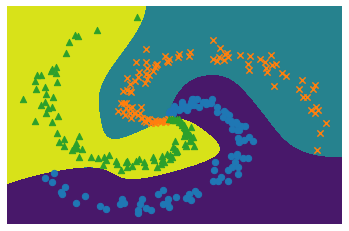

In [7]:

# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점 플롯
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()